In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf  # Para gráficos de velas
import seaborn as sns
df=pd.read_csv('../data/btc_data.csv')

In [15]:
df.head(5)

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base,taker_buy_quote,ignore
0,2023-01-02,16617.17,16799.23,16548.70,16672.87,121888.57191,1672703999999,2.034683e+09,4036118,60925.25948,1.017075e+09,0
1,2023-01-03,16672.78,16778.40,16605.28,16675.18,159541.53733,1672790399999,2.662766e+09,5097596,79595.76246,1.328471e+09,0
2,2023-01-04,16675.65,16991.87,16652.66,16850.36,220362.18862,1672876799999,3.709833e+09,6310703,109747.11502,1.847617e+09,0
3,2023-01-05,16850.36,16879.82,16753.00,16831.85,163473.56641,1672963199999,2.751080e+09,4842014,80959.57162,1.362472e+09,0
4,2023-01-06,16831.85,17041.00,16679.00,16950.65,207401.28415,1673049599999,3.490305e+09,5388661,103320.22965,1.738828e+09,0


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           809 non-null    object 
 1   open                809 non-null    float64
 2   high                809 non-null    float64
 3   low                 809 non-null    float64
 4   close               809 non-null    float64
 5   volume              809 non-null    float64
 6   close_time          809 non-null    int64  
 7   quote_asset_volume  809 non-null    float64
 8   number_of_trades    809 non-null    int64  
 9   taker_buy_base      809 non-null    float64
 10  taker_buy_quote     809 non-null    float64
 11  ignore              809 non-null    int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 76.0+ KB


In [17]:
df.isnull().sum()

timestamp             0
open                  0
high                  0
low                   0
close                 0
volume                0
close_time            0
quote_asset_volume    0
number_of_trades      0
taker_buy_base        0
taker_buy_quote       0
ignore                0
dtype: int64

In [18]:
df.describe()

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base,taker_buy_quote,ignore
count,809.000000,809.000000,809.000000,809.000000,809.000000,8.090000e+02,8.090000e+02,8.090000e+02,809.000000,8.090000e+02,809.0
mean,51990.896279,53037.024747,50956.379815,52074.468393,64000.969445,1.707610e+12,2.456685e+09,2.871962e+06,31713.602868,1.214806e+09,0.0
std,24987.818364,25524.519271,24369.695085,24982.409362,94381.308501,2.019017e+10,2.298174e+09,2.749386e+06,47264.129376,1.152836e+09,0.0
min,16617.170000,16778.400000,16548.700000,16672.870000,7047.904300,1.672704e+12,2.508740e+08,3.108520e+05,3412.376710,1.165812e+08,0.0
25%,28243.650000,28750.000000,27711.000000,28295.410000,23137.429750,1.690157e+12,1.052864e+09,1.055115e+06,11295.254520,5.107229e+08,0.0
50%,47132.780000,48592.660000,46800.000000,47751.090000,33355.068880,1.707610e+12,1.722666e+09,1.670745e+06,16321.136540,8.499974e+08,0.0
75%,67610.000000,68693.260000,66251.780000,67620.010000,53111.568740,1.725062e+12,2.808472e+09,3.774761e+06,26150.503770,1.403784e+09,0.0
max,106143.820000,109588.000000,105321.490000,106143.820000,699360.934230,1.742515e+12,1.746531e+10,1.522359e+07,351739.119940,8.783916e+09,0.0


In [19]:
# Convertir la columna de fecha a formato datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           809 non-null    datetime64[ns]
 1   open                809 non-null    float64       
 2   high                809 non-null    float64       
 3   low                 809 non-null    float64       
 4   close               809 non-null    float64       
 5   volume              809 non-null    float64       
 6   close_time          809 non-null    int64         
 7   quote_asset_volume  809 non-null    float64       
 8   number_of_trades    809 non-null    int64         
 9   taker_buy_base      809 non-null    float64       
 10  taker_buy_quote     809 non-null    float64       
 11  ignore              809 non-null    int64         
dtypes: datetime64[ns](1), float64(8), int64(3)
memory usage: 76.0 KB


Monstramos la evolución del precio de Bitcoin a lo largo del tiempo.

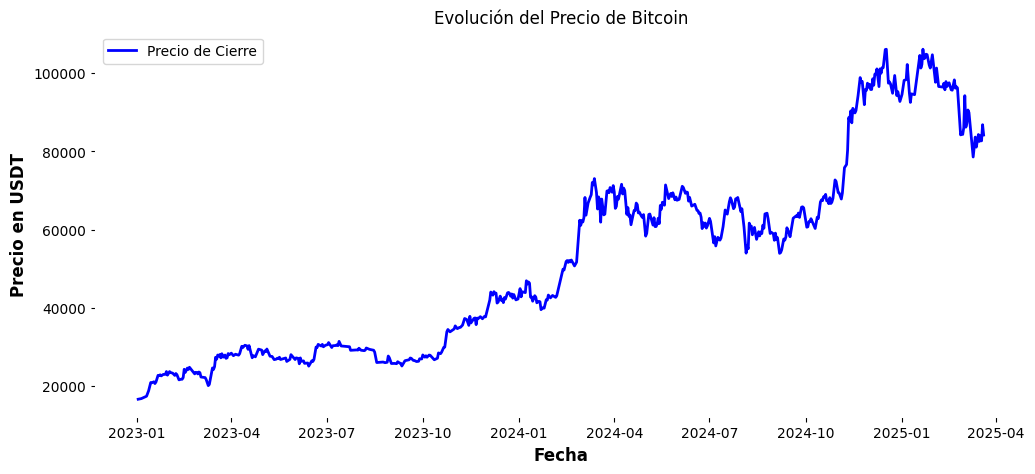

In [20]:
# Graficar el precio de cierre
plt.figure(figsize=(12, 5))
plt.plot(df["timestamp"], df["close"], label='Precio de Cierre', color='blue')
plt.xlabel("Fecha")
plt.ylabel("Precio en USDT")
plt.title("Evolución del Precio de Bitcoin")
plt.legend()
plt.grid()
plt.show()

Usamos mplfinance para visualizar la acción del precio de manera más detallada de los ultimos 90 días.

Por lo observado, en este periodo de tiempo indica una tendencia bajista el precio.

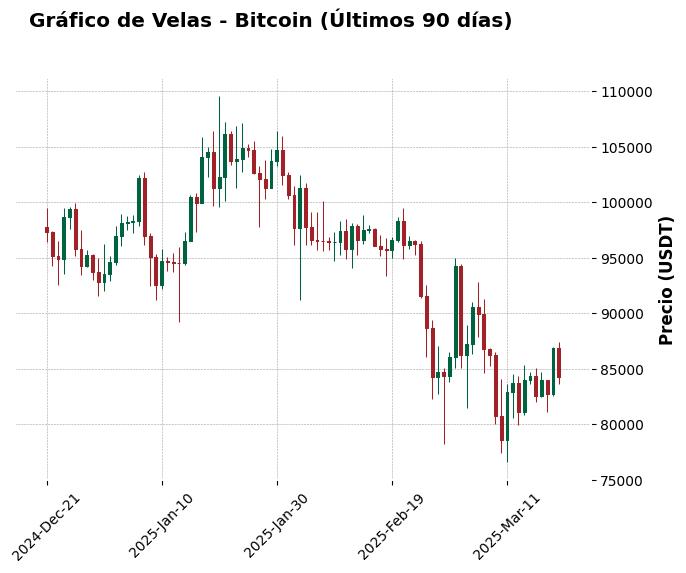

In [21]:
# Gráfico de velas (candlestick) con los últimos 90 días
df_candlestick = df.set_index("timestamp")[["open", "high", "low", "close"]].tail(90)  # Últimos 90 días
mpf.plot(df_candlestick, type='candle', style='charles', title='Gráfico de Velas - Bitcoin (Últimos 90 días)', ylabel='Precio (USDT)', warn_too_much_data=100)


Graficamos el volumen de transacciones

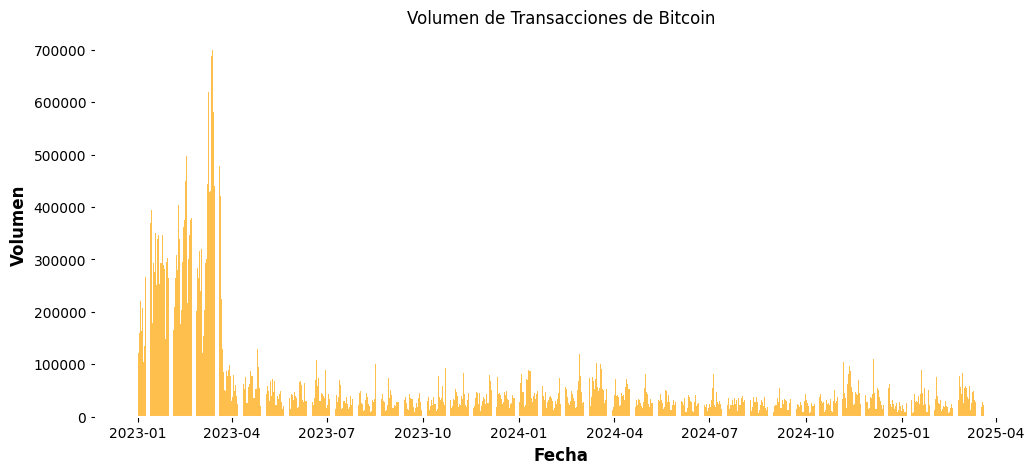

In [22]:
plt.figure(figsize=(12, 5))
plt.bar(df["timestamp"], df["volume"], color='orange', alpha=0.7)
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.title("Volumen de Transacciones de Bitcoin")
plt.grid()
plt.show()

Medias Móviles Simples (SMA)

- SMA 20 días (línea verde) → Refleja la tendencia a corto plazo.

- SMA 50 días (línea roja) → Muestra la tendencia a mediano plazo.

- Señal de compra: Cuando la SMA 20 cruza por encima de la SMA 50.

- Señal de venta: Cuando la SMA 20 cruza por debajo de la SMA 50.

Índice de Fuerza Relativa (RSI)

- Valores sobre 70 → Mercado sobrecomprado (posible caída).

- Valores bajo 30 → Mercado sobrevendido (posible rebote).

- Puede ayudar a detectar posibles cambios de tendencia.

In [23]:
# Calcular Medias Móviles Simples (SMA)
df["SMA_20"] = df["close"].rolling(window=20).mean()
df["SMA_50"] = df["close"].rolling(window=50).mean()

In [24]:
# Calcular RSI (Relative Strength Index)
def compute_rsi(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df["RSI_14"] = compute_rsi(df["close"], 14)

Grafico de precio de cierre con Medias Móviles

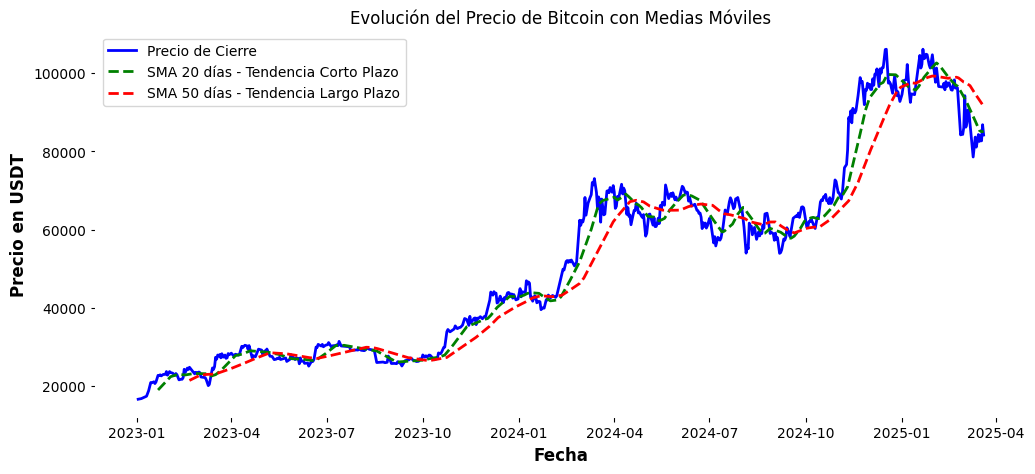

In [25]:
plt.figure(figsize=(12, 5))
plt.plot(df["timestamp"], df["close"], label='Precio de Cierre', color='blue')
plt.plot(df["timestamp"], df["SMA_20"], label='SMA 20 días - Tendencia Corto Plazo', color='green', linestyle='dashed')
plt.plot(df["timestamp"], df["SMA_50"], label='SMA 50 días - Tendencia Largo Plazo', color='red', linestyle='dashed')
plt.xlabel("Fecha")
plt.ylabel("Precio en USDT")
plt.title("Evolución del Precio de Bitcoin con Medias Móviles")
plt.legend()
plt.grid()
plt.show()

Como Podemos analizarlo

-Tendencia Alcista:
 - Si la SMA 20 días cruza por encima de la SMA 50 días, puede indicar una señal de compra.
 - Confirma que el precio está en un impulso alcista y que la demanda es fuerte. 

-Tendencia Bajista:
 - Si la SMA 20 días cruza por debajo de la SMA 50 días, puede indicar una señal de venta.
 - Sugiere que el precio está perdiendo fuerza y podría continuar bajando.

-Tendencia indefinida:
 - Cuando las medias móviles están muy juntas y el precio se mueve de manera lateral, significa que no hay una tendencia clara.
 - Es mejor esperar una confirmación antes de tomar decisiones.


RSI

Mide la fuerza y velocidad de los movimientos de precio, oscilando entre 0 y 100. Se usa para identificar zonas de sobrecompra y sobreventa.

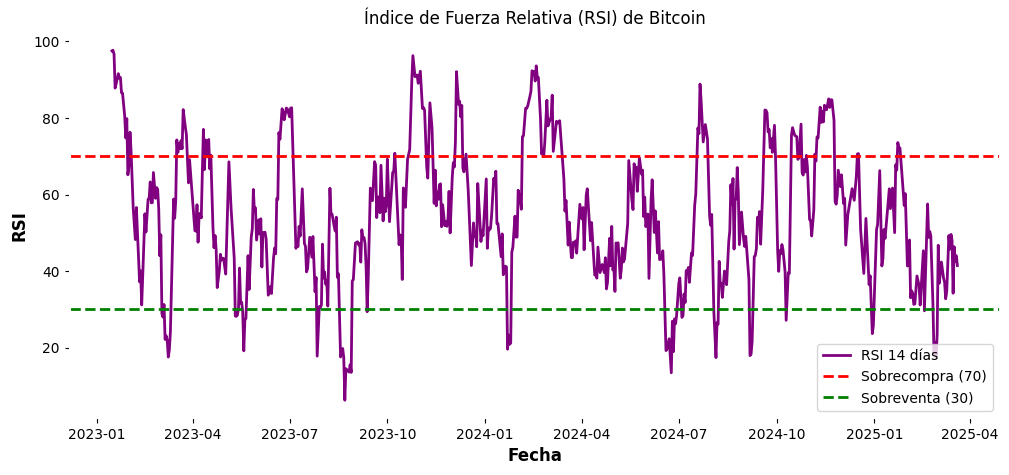

In [26]:
# Graficar el RSI
plt.figure(figsize=(12, 5))
plt.plot(df["timestamp"], df["RSI_14"], label='RSI 14 días', color='purple')
plt.axhline(70, color='red', linestyle='dashed', label='Sobrecompra (70)')
plt.axhline(30, color='green', linestyle='dashed', label='Sobreventa (30)')
plt.xlabel("Fecha")
plt.ylabel("RSI")
plt.title("Índice de Fuerza Relativa (RSI) de Bitcoin")
plt.legend()
plt.grid()
plt.show()


RSI > 70 (Zona de Sobrecompra) 

 - El precio ha subido demasiado rápido y podría haber una corrección a la baja.

 - Señal de alerta para una posible venta.

RSI < 30 (Zona de Sobreventa) 

 - El precio ha caído mucho en poco tiempo y podría rebotar al alza.

 - Puede ser una oportunidad de compra.

Zona intermedia (30 - 70) 

 -Mercado estable, sin señales claras de sobrecompra o sobreventa.

Señales clave:

 -Si el RSI cruza por encima de 70, podríamos ver una caída del precio.

 -Si el RSI cruza por debajo de 30, el precio podría subir pronto.


In [27]:
# Calculamos Bandas de Bollinger
df["BB_Middle"] = df["SMA_20"]
df["BB_Upper"] = df["SMA_20"] + (df["close"].rolling(window=20).std() * 2)
df["BB_Lower"] = df["SMA_20"] - (df["close"].rolling(window=20).std() * 2)



In [ ]:
# Creamos la variable objetivo (1 = Sube, 0 = Baja)
df["tendencicion"] = (df["close"].shift(-7) > df["close"]).astype(int)

In [31]:
# Guardamos el dataset con características calculadas
df.to_csv("../data/btc_data_features.csv", index=False)

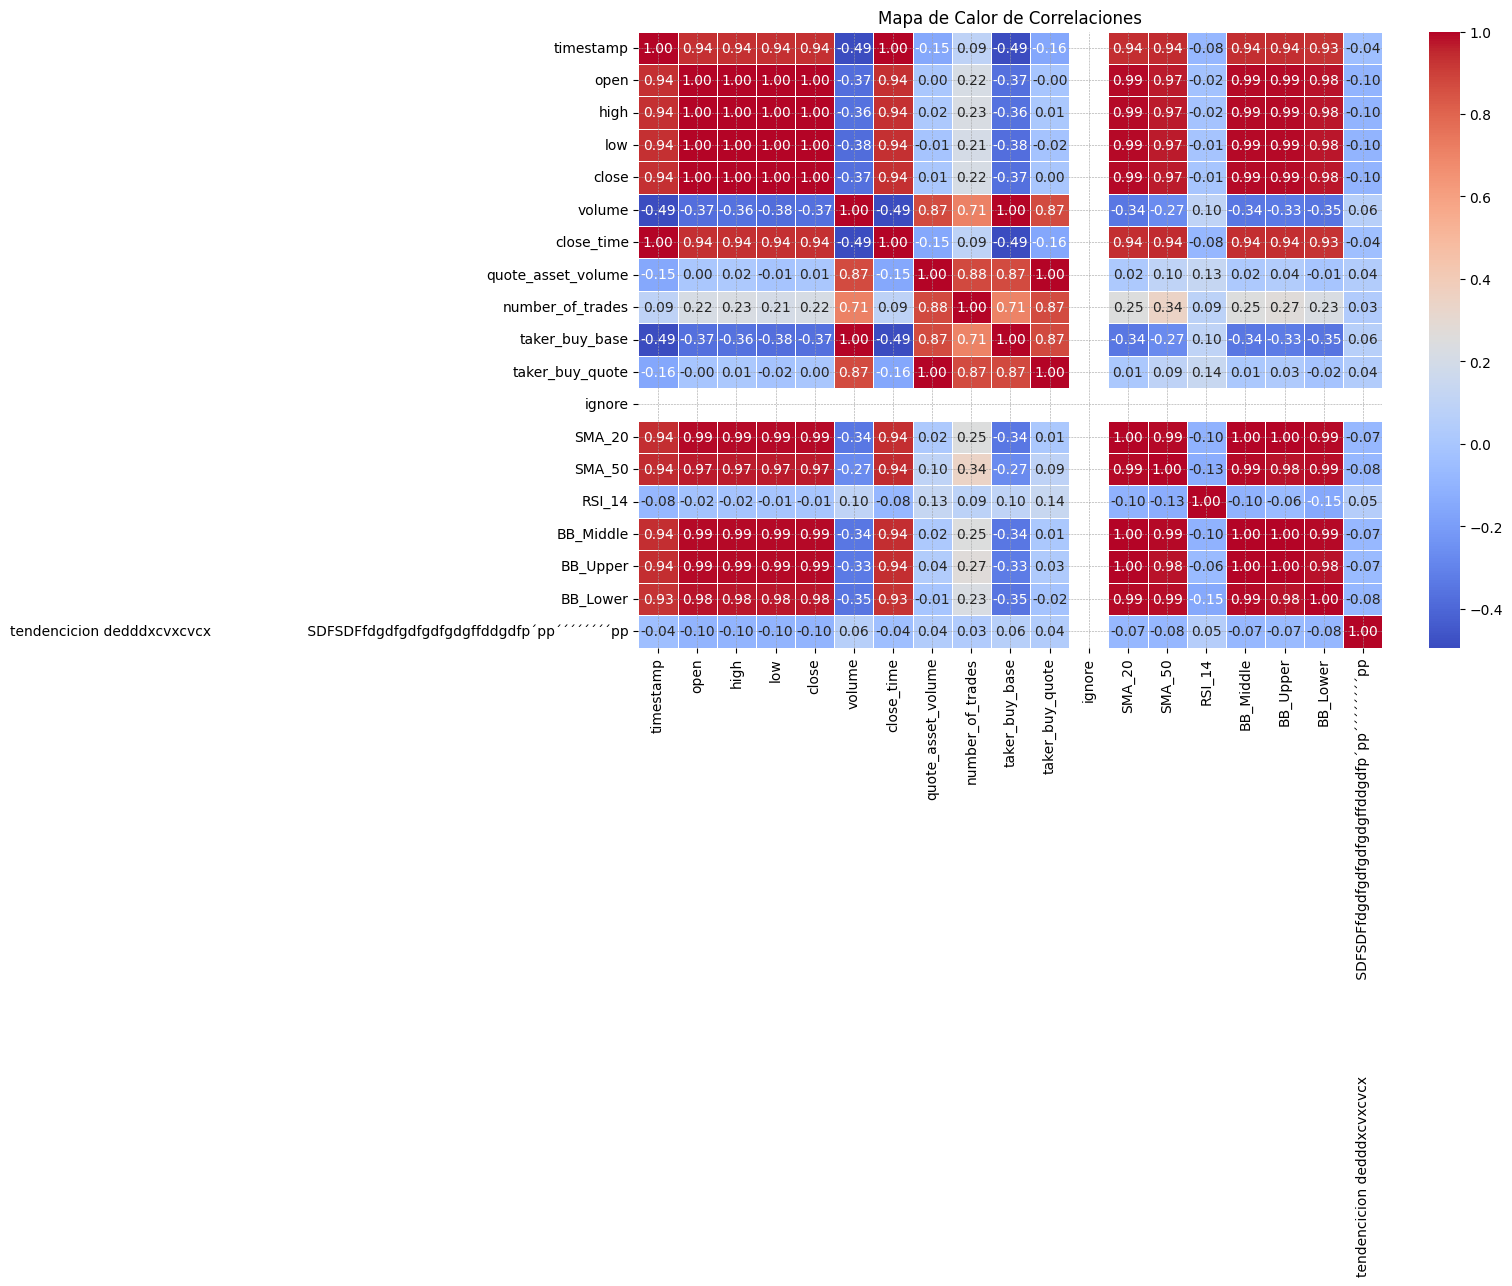

In [32]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()